In [8]:
import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.loader import DataLoader
from scripts.cleaner import DataCleaner
from scripts.eda_stats import EDAAnalyzer
from scripts.visualizer import DataVisualizer
from scripts.logger import setup_logger

# Initialize Logger
logger = setup_logger('Insurance_Analysis')

In [ ]:
FILE_PATH = '../data/MachineLearningRating_v3.txt'
loader = DataLoader(FILE_PATH)
df_raw = loader.load_data()


🔄 Loading data from ../data/MachineLearningRating_v3.txt...
✅ Data loaded successfully! Shape: (1000100, 52)


In [ ]:
cleaner = DataCleaner(df_raw)
cleaner.convert_to_datetime(['TransactionMonth', 'VehicleIntroDate'])
cleaner.convert_to_numeric(['TotalPremium', 'TotalClaims', 'SumInsured'])
cleaner.impute_categorical(['Gender', 'MaritalStatus'])
df = cleaner.get_cleaned_data()


/Users/mac/Documents/kaim/week3/scripts/cleaner.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col], errors='coerce')


In [11]:
analyzer = EDAAnalyzer(df)
viz = DataVisualizer(df)

logger.info("Data Loaded and Cleaned.")

2025-12-09 11:07:02,091 - INFO - Data Loaded and Cleaned.
2025-12-09 11:07:02,091 - INFO - Data Loaded and Cleaned.


2025-12-09 11:07:16,231 - INFO - Starting Univariate Analysis
2025-12-09 11:07:16,231 - INFO - Starting Univariate Analysis
/Users/mac/Documents/kaim/week3/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


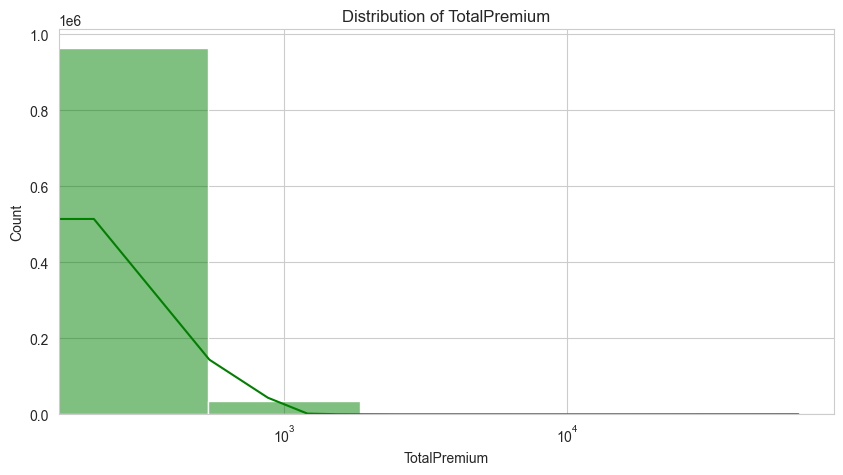

/Users/mac/Documents/kaim/week3/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


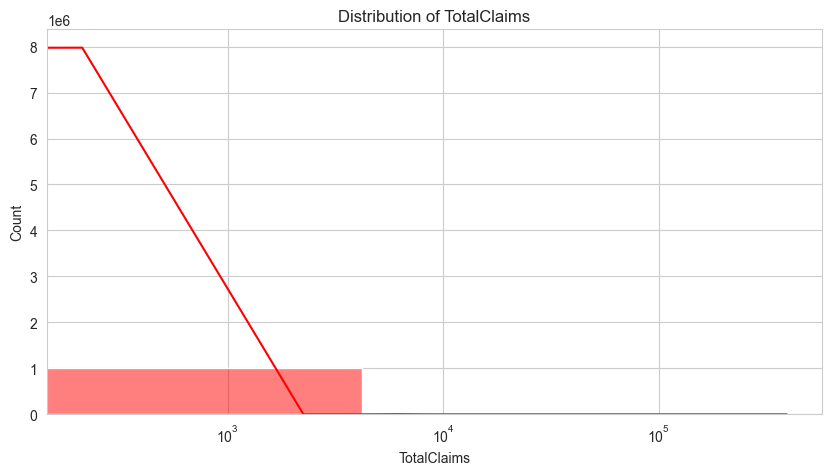

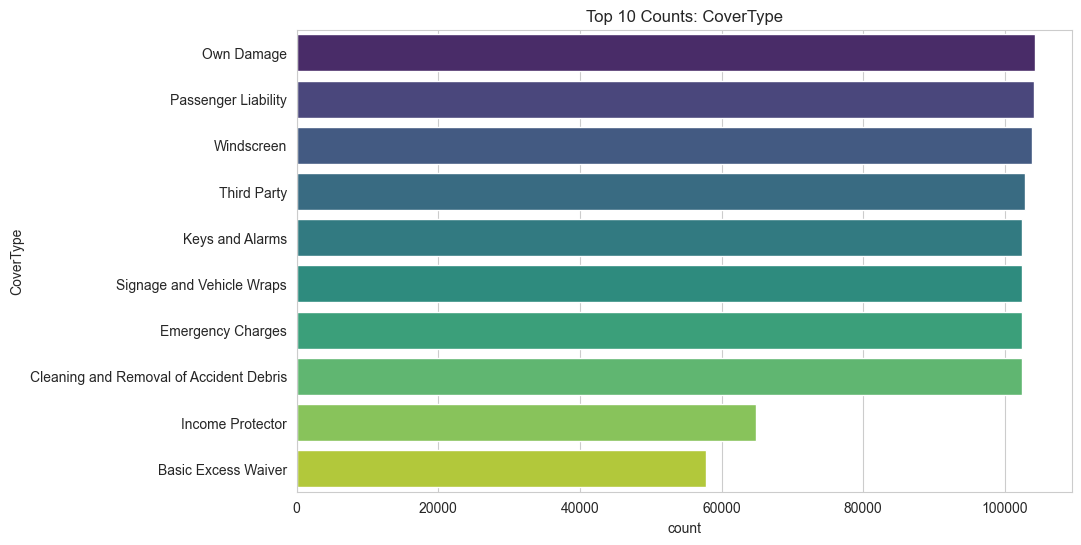

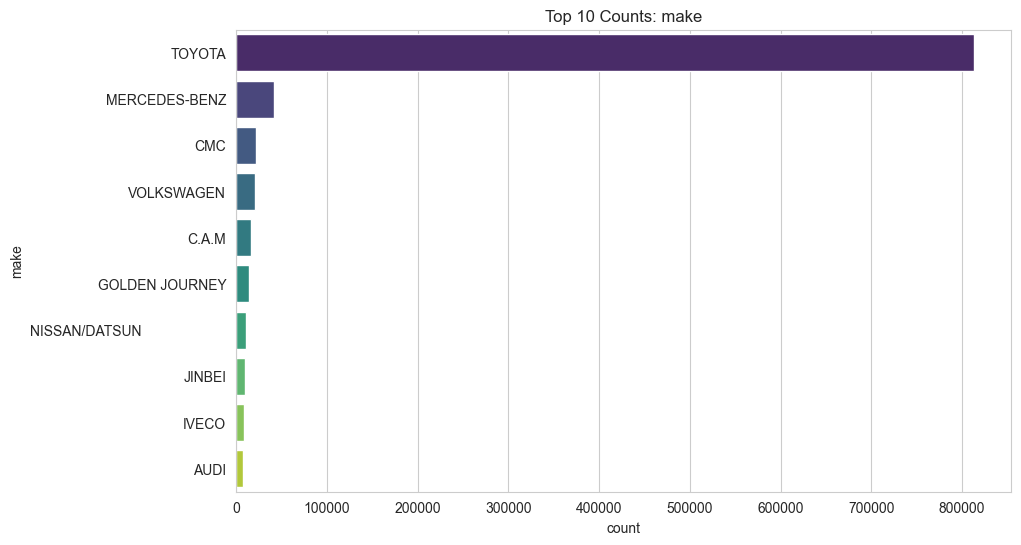

In [12]:
logger.info("Starting Univariate Analysis")

# 1. Numerical Distribution
viz.plot_histogram('TotalPremium', color='green', log_scale=True)
viz.plot_histogram('TotalClaims', color='red', log_scale=True)

# 2. Categorical Counts
viz.plot_counts('CoverType')
viz.plot_counts('make')

2025-12-09 11:08:15,087 - INFO - Starting Bivariate Analysis
2025-12-09 11:08:15,087 - INFO - Starting Bivariate Analysis


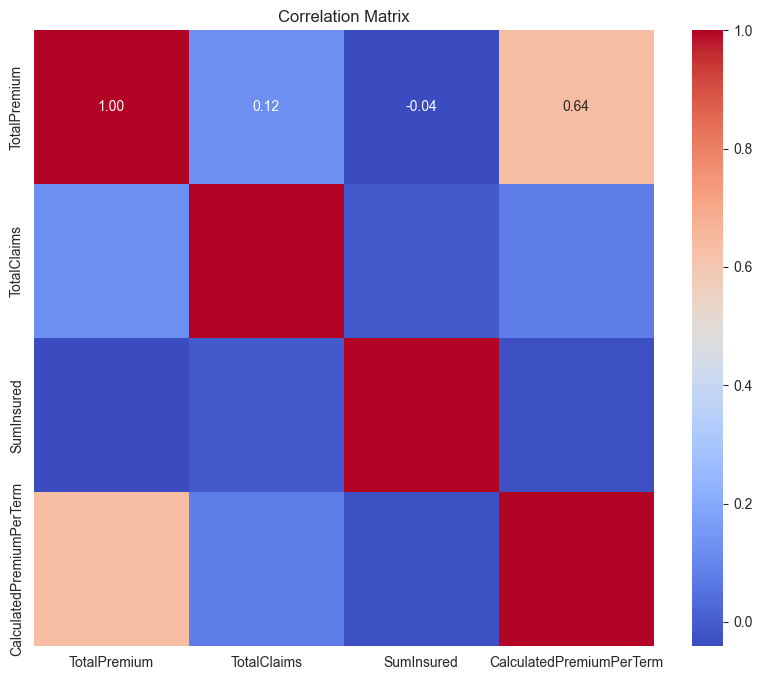

/Users/mac/Documents/kaim/week3/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


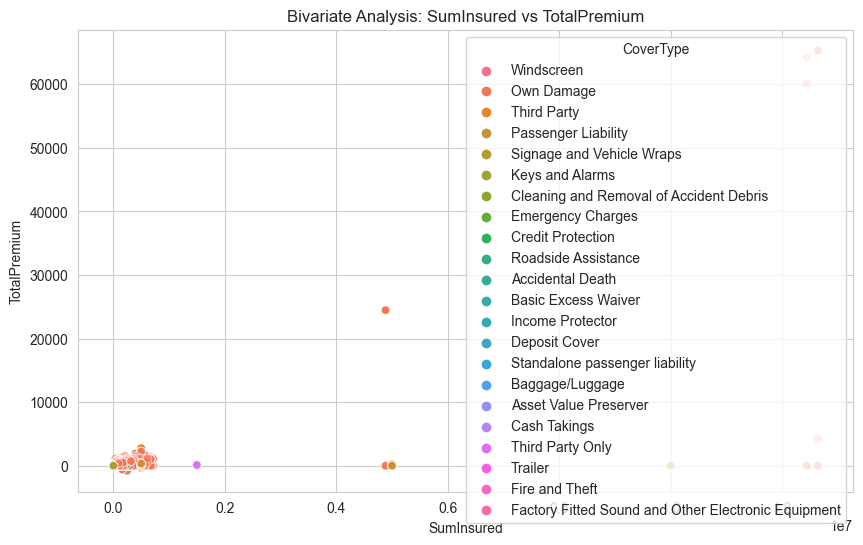

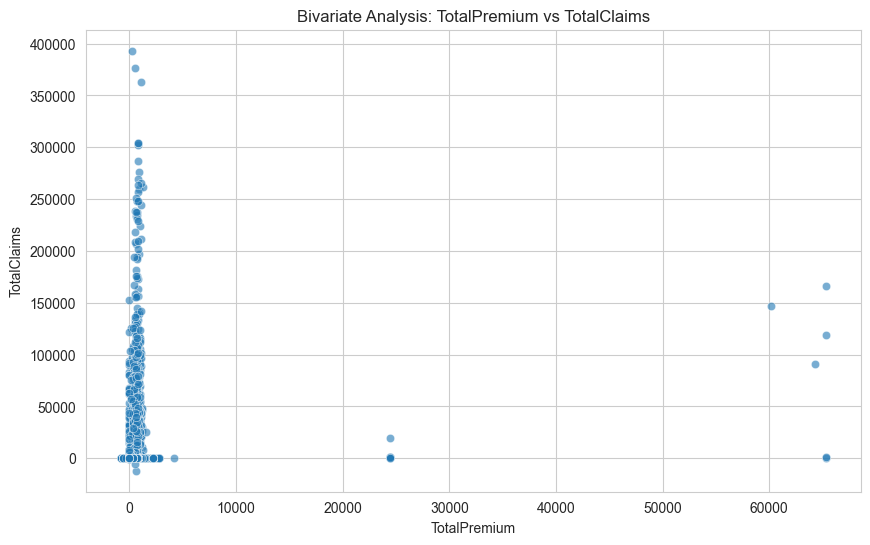

In [13]:
logger.info("Starting Bivariate Analysis")

# 1. Correlation Matrix
cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
corr = analyzer.get_correlation_matrix(cols)
viz.plot_correlation_heatmap(corr)

# 2. Scatter Plots (Relationship between features)
viz.plot_bivariate_scatter('SumInsured', 'TotalPremium', hue='CoverType')
viz.plot_bivariate_scatter('TotalPremium', 'TotalClaims')

2025-12-09 11:11:54,338 - INFO - Starting Outlier Analysis
2025-12-09 11:11:54,338 - INFO - Starting Outlier Analysis


Total Claims Outlier Statistics:


{'IQR': np.float64(0.0),
 'Lower Bound': np.float64(0.0),
 'Upper Bound': np.float64(0.0),
 'Outliers Count': 2793,
 'Outliers Percentage': 0.2792720727927207}

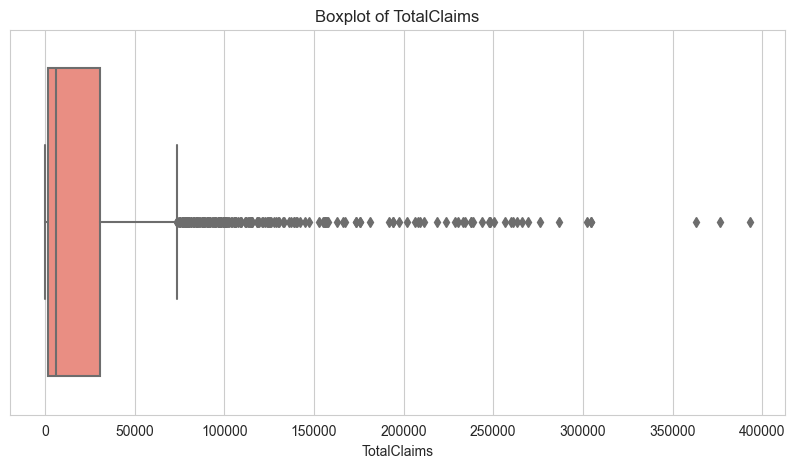

In [14]:
logger.info("Starting Outlier Analysis")

# 1. Get the numbers (Explicit Analysis)
outliers_stats = analyzer.detect_outliers_iqr('TotalClaims')
print("Total Claims Outlier Statistics:")
display(outliers_stats)

# 2. Visualize
viz.plot_outliers('TotalClaims')